In [1]:
import pandas as pd
df = pd.read_excel ("D://IIT Kanpur//Data mining (MTH552A)//Online Retail.xlsx")

In [6]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [11]:
import os
import warnings
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

In [63]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [5]:
print(df.shape[0])

541909


In [46]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [13]:
df.describe()
#observe negative min quantity and unit price

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [55]:
print(df.apply(lambda x: x.unique().shape[0]))
print(len(df["Description"].unique()))
df["Description"].unique()

InvoiceNo      18532
StockCode       3665
Description     3866
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64
3866


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [16]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [2]:
df = df.dropna()
df.shape

(406829, 8)

In [47]:
df[df.Quantity<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [48]:
df[df.UnitPrice<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [3]:
df = df[~(df.Quantity<0)]
df = df[df.UnitPrice>0]

In [4]:
df.shape[0]

397884

In [52]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


C:\Users\debra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


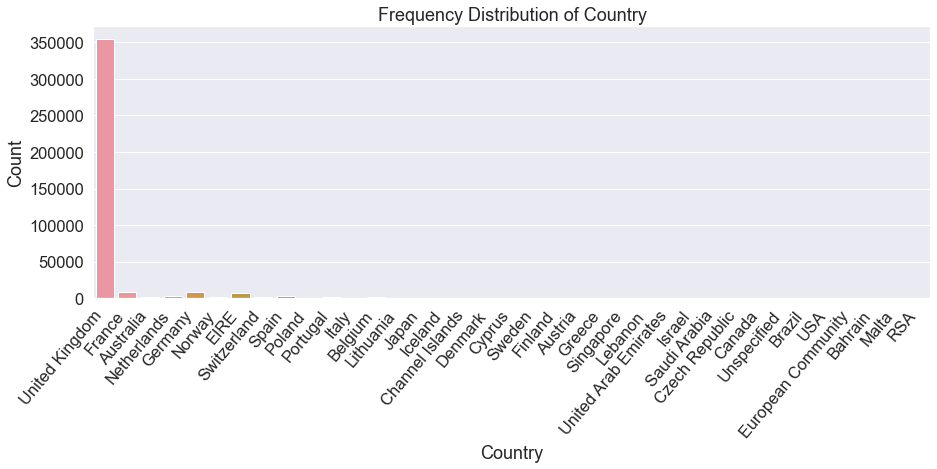

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(df['Country'])
plt.xticks(rotation=50,ha="right")
plt.title("Frequency Distribution of Country")
plt.xlabel('Country')
plt.ylabel('Count');

In [57]:
df.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

C:\Users\debra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


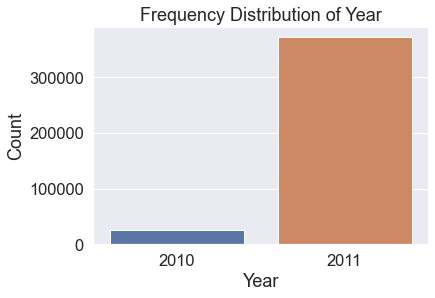

In [58]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
sns.countplot(df['InvoiceDate'].dt.year)
plt.title("Frequency Distribution of Year")
plt.xlabel('Year')
plt.ylabel('Count');

C:\Users\debra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


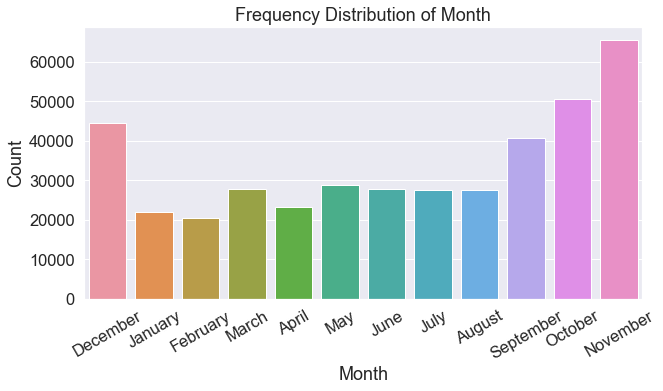

In [43]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
sns.countplot(df['InvoiceDate'].dt.month_name())
plt.title("Frequency Distribution of Month")
plt.ylabel('Count')
plt.xlabel('Month');

In [62]:
df.groupby("Description").first()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
10 COLOUR SPACEBOY PEN,536408,22418,24,2010-12-01 11:41:00,0.85,14307.0,United Kingdom
12 COLOURED PARTY BALLOONS,536743,22436,10,2010-12-02 13:32:00,0.65,17964.0,United Kingdom
12 DAISY PEGS IN WOOD BOX,536412,21448,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
12 EGG HOUSE PAINTED WOOD,539728,22282,2,2010-12-21 14:26:00,12.75,16270.0,United Kingdom
12 HANGING EGGS HAND PAINTED,576624,23442,10,2011-11-15 17:14:00,2.08,16156.0,United Kingdom
...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,550823,23144,144,2011-04-21 09:36:00,0.72,16133.0,United Kingdom
ZINC TOP 2 DOOR WOODEN SHELF,537809,21275,1,2010-12-08 13:28:00,16.95,14217.0,United Kingdom
ZINC WILLIE WINKIE CANDLE STICK,536381,84832,1,2010-12-01 09:41:00,0.85,15311.0,United Kingdom


In [9]:
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [14]:
basket_France.describe()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,...,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,0.002571,0.023136,0.012853,0.002571,0.017995,0.041131,0.002571,0.030848,0.015424,0.002571,...,0.002571,0.007712,0.005141,0.002571,0.002571,0.017995,0.002571,0.005141,0.002571,0.005141
std,0.050702,0.150530,0.112787,0.050702,0.133104,0.198849,0.050702,0.173129,0.123391,0.050702,...,0.050702,0.087592,0.071611,0.050702,0.050702,0.133104,0.050702,0.071611,0.050702,0.071611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [12]:
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules

In [70]:
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)

In [79]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.077121,0.771208,0.077121,1.000,1.296667,0.017645,inf
257,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051414,0.771208,0.051414,1.000,1.296667,0.011763,inf
268,"(PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...",(POSTAGE),0.053985,0.771208,0.053985,1.000,1.296667,0.012351,inf
299,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102828,0.128535,0.100257,0.975,7.585500,0.087040,34.858612
298,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102828,0.138817,0.100257,0.975,7.023611,0.085983,34.447301


In [21]:
basket_UK = (converted_df_[converted_df_['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [24]:
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

In [35]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)

In [36]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010753,0.010873,0.010153,0.944134,86.829038,0.010036,17.705365
148,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010873,0.010753,0.010153,0.933702,86.829038,0.010036,14.921137
937,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.010994,0.024090,0.010213,0.928962,38.562337,0.009948,13.737812
943,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.013517,0.036766,0.012135,0.897778,24.418969,0.011638,9.422945
607,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.022948,0.036766,0.020425,0.890052,24.208842,0.019582,8.760846


In [37]:
rules.to_csv("UK association rules.csv")

In [28]:
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 101.8 MB


In [29]:
converted_df = df.astype('category')

In [30]:
converted_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    397884 non-null  category
 1   StockCode    397884 non-null  category
 2   Description  397884 non-null  category
 3   Quantity     397884 non-null  category
 4   InvoiceDate  397884 non-null  category
 5   UnitPrice    397884 non-null  category
 6   CustomerID   397884 non-null  category
 7   Country      397884 non-null  category
dtypes: category(8)
memory usage: 10.9 MB


In [5]:
converted_df=df.copy()

In [6]:
converted_df["InvoiceNo"]=df["InvoiceNo"].astype('category')

In [7]:
converted_df["StockCode"]=df["StockCode"].astype('category')

In [8]:
converted_df["Country"]=df["Country"].astype('category')

In [9]:
converted_df["Description"]=df["Description"].astype('category')

In [12]:
converted_df["Quantity"]=df["Quantity"].astype(np.uint8)

In [13]:
converted_df["UnitPrice"]=df["UnitPrice"].astype('float16')

In [15]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
print(converted_df.dtypes)

InvoiceNo            category
StockCode            category
Description          category
Quantity                uint8
InvoiceDate    datetime64[ns]
UnitPrice             float16
CustomerID            float16
Country              category
dtype: object


In [18]:
converted_df_=df.copy()
converted_df_["Quantity"]=df["Quantity"].astype(np.uint8)

In [19]:
converted_df["UnitPrice"]=df["UnitPrice"].astype('float16')

In [20]:
converted_df["CustomerID"]=df["CustomerID"].astype('float16')

In [28]:
converted_df_.shape

(397884, 8)

In [31]:
basket_UK_=basket_UK.copy()

In [33]:
basket_UK_.dtypes

Description
 4 PURPLE FLOCK DINNER CANDLES      int64
 50'S CHRISTMAS GIFT BAG LARGE      int64
 DOLLY GIRL BEAKER                  int64
 I LOVE LONDON MINI BACKPACK        int64
 NINE DRAWER OFFICE TIDY            int64
                                    ...  
ZINC T-LIGHT HOLDER STARS SMALL     int64
ZINC TOP  2 DOOR WOODEN SHELF       int64
ZINC WILLIE WINKIE  CANDLE STICK    int64
ZINC WIRE KITCHEN ORGANISER         int64
ZINC WIRE SWEETHEART LETTER TRAY    int64
Length: 3844, dtype: object

In [34]:
basket_UK_=basket_UK.astype(np.uint8)

In [41]:
df['Amount']=df['Quantity']*df['UnitPrice']
df_Monetory_val=df.groupby('CustomerID')['Amount'].sum().reset_index()
df_Monetory_val

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [44]:
df_frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,756


In [46]:
reference_date=df.InvoiceDate.max() + datetime.timedelta(days = 1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [57]:
df['Recency'] = (reference_date - df.InvoiceDate).astype('timedelta64[D]')
df_recency =  df[['CustomerID', 'Recency']].groupby("CustomerID").min().reset_index()
df_recency

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0
...,...,...
4333,18280.0,278.0
4334,18281.0,181.0
4335,18282.0,8.0
4336,18283.0,4.0


In [58]:
customer_df=pd.merge(df_Monetory_val, df_frequency, on='CustomerID', how='inner')
customer_df=pd.merge(customer_df,df_recency,on='CustomerID', how='inner')
customer_df
customer_df.describe()

,CustomerID,Amount,Frequency,Recency
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,91.720609,92.536422
std,1721.808492,8989.230441,228.785094,100.014169
min,12346.000000,3.750000,1.000000,1.000000
25%,13813.250000,307.415000,17.000000,18.000000
50%,15299.500000,674.485000,41.000000,51.000000
75%,16778.750000,1661.740000,100.000000,142.000000
max,18287.000000,280206.020000,7847.000000,374.000000


C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\debra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount', ylabel='Density'>

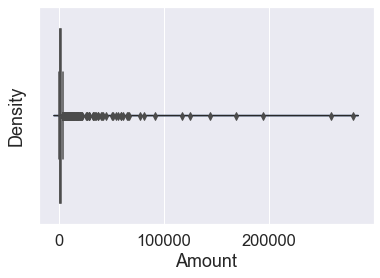

In [70]:
sns.distplot(customer_df.Amount,fit=norm);
sns.boxplot(customer_df.Amount)

C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


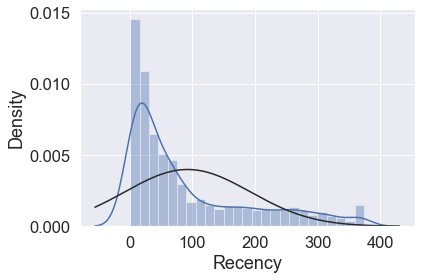

In [68]:
sns.distplot(customer_df.Recency,fit=norm);

C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


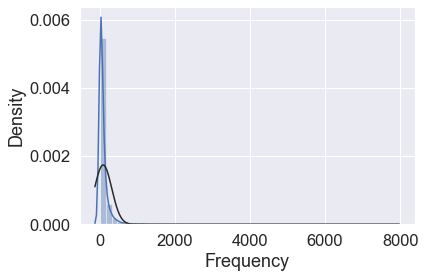

In [69]:
sns.distplot(customer_df.Frequency,fit=norm);

In [74]:
customer_df['Recency_log'] = customer_df['Recency'].apply(math.log)
customer_df['Frequency_log'] = customer_df['Frequency'].apply(math.log)
customer_df['Amount_log'] = customer_df['Amount'].apply(math.log)

In [75]:
feature_vector = ['Amount_log', 'Recency_log','Frequency_log']
X_subset = customer_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns)

,Amount_log,Recency_log,Frequency_log
0,3.698719,1.409894,-2.775160
1,1.410201,-2.146498,1.149549
2,0.716419,0.383971,-0.185347
3,0.698706,-0.574674,0.460579
4,-0.617446,1.374758,-0.638433
...,...,...,...
4333,-1.106086,1.298690,-1.038617
4334,-1.743850,0.999081,-1.307611
4335,-1.117365,-1.178605,-0.901116
4336,0.837969,-1.662552,2.223515


C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


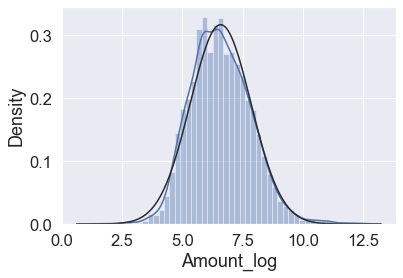

In [76]:
sns.distplot(customer_df.Amount_log,fit=norm);

C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


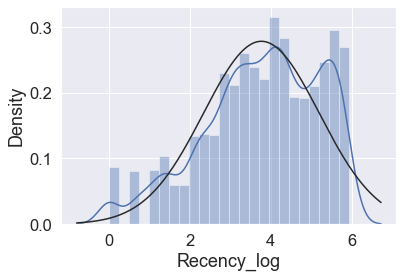

In [77]:
sns.distplot(customer_df.Recency_log,fit=norm);

C:\Users\debra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


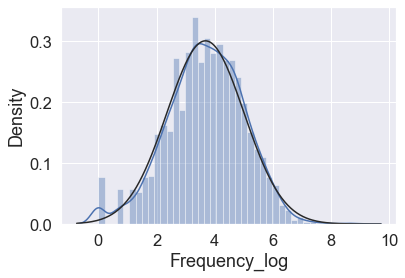

In [78]:
sns.distplot(customer_df.Frequency_log,fit=norm);

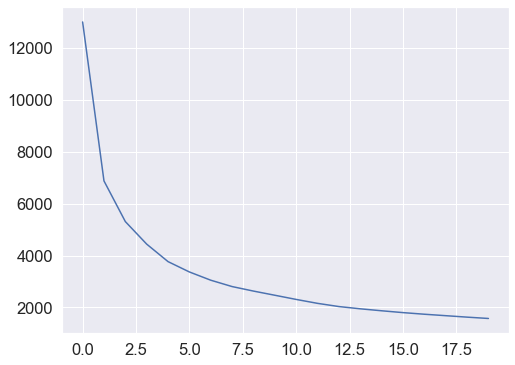

In [85]:
cl = 20
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    model = KMeans(
        n_clusters=k, 
        init='k-means++', 
        n_init=10,
        max_iter=400,
        algorithm='full')

    model = model.fit(X_scaled)
    labels = model.labels_
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.plot(cost)
plt.show()

In [105]:
K_best

6

In [117]:
model_6 = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=400, algorithm='full')
model_6 = model_6.fit(X_scaled)
labels_6 = model_6.labels_
centers_6=model_6.cluster_centers_

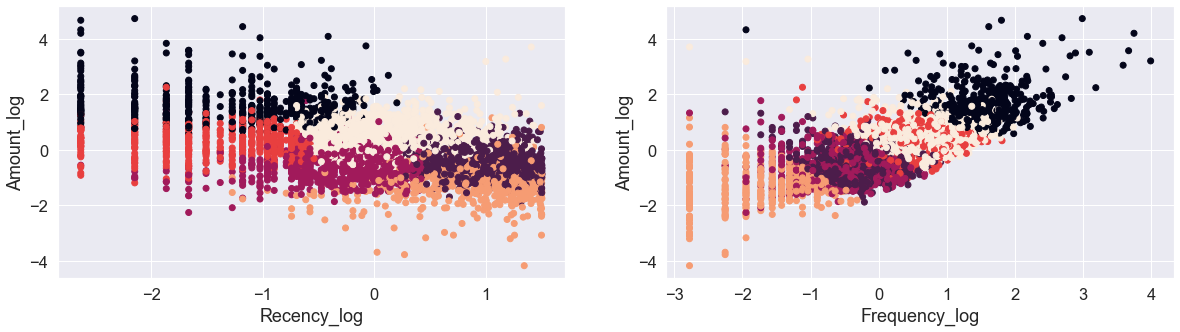

In [118]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=labels_6.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=labels_6.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [119]:
features = ['amount',  'recency',  'frequency']
cent_transformed = scaler.inverse_transform(centers_6)
centers_6=pd.DataFrame(np.exp(cent_transformed),columns=features)
centers_6

,amount,recency,frequency
0,6084.948359,6.845190,288.769750
1,438.228333,175.990326,26.351859
2,343.363322,28.543931,20.084052
3,1117.304026,5.778938,72.247951
4,140.610499,155.427364,4.973035
5,1543.120883,50.313661,89.762781


In [120]:
model_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=400, algorithm='full')
model_3 = model_3.fit(X_scaled)
labels_3 = model_3.labels_
centers_3=model_3.cluster_centers_

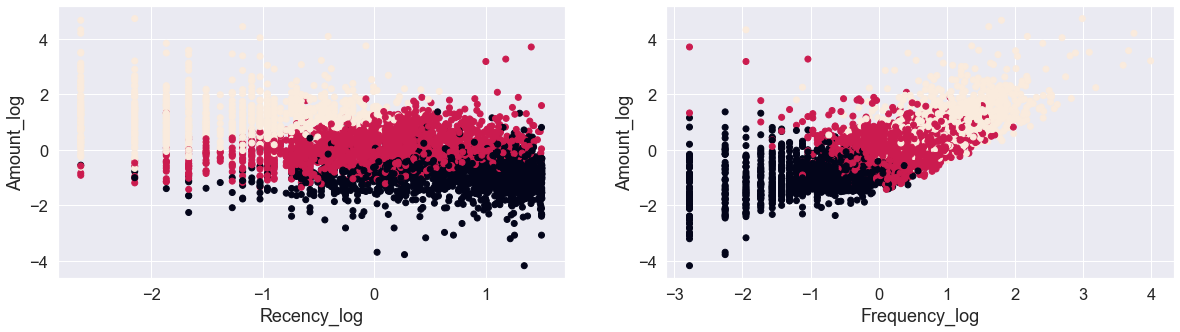

In [121]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=labels_3.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=labels_3.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [122]:
cent_transformed = scaler.inverse_transform(centers_3)
centers_3=pd.DataFrame(np.exp(cent_transformed),columns=features)
centers_3

,amount,recency,frequency
0,228.012588,123.434466,10.810040
1,859.636385,44.539163,53.084459
2,3356.931532,7.691178,177.815660


In [123]:
model_5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=400, algorithm='full')
model_5 = model_5.fit(X_scaled)
labels_5 = model_5.labels_
centers_5=model_5.cluster_centers_

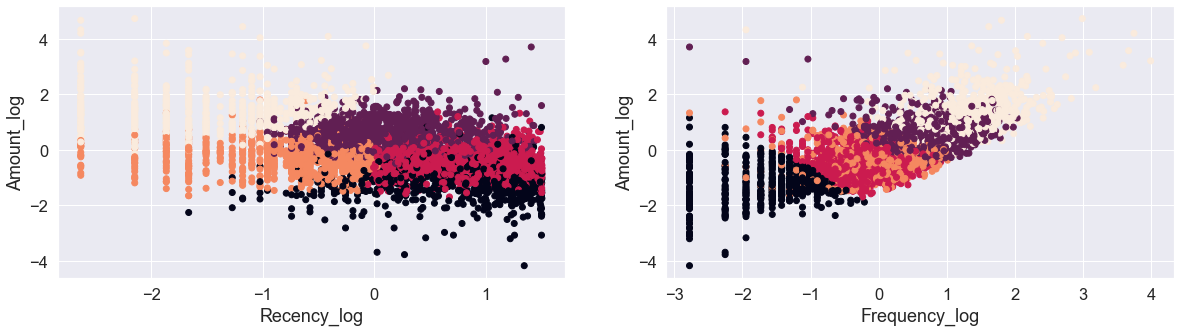

In [124]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=labels_5.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=labels_5.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [125]:
cent_transformed = scaler.inverse_transform(centers_5)
centers_5=pd.DataFrame(np.exp(cent_transformed),columns=features)
centers_5

,amount,recency,frequency
0,150.536012,124.178365,5.472335
1,1607.740422,48.675577,93.002867
2,433.510341,139.167793,26.217846
3,500.844388,13.157359,32.138952
4,4235.618672,5.957946,218.381441


In [128]:
customer_df['clusters_3'] = centers_3

ValueError: Wrong number of items passed 3, placement implies 1